In [1]:
import warnings
import pickle
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")

## Binary

In [3]:
import json
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

df_res = pd.DataFrame(columns=['model', 'task', 'f1', 'auc', 'acc'])

for task_type in ['twitter', 'reddit']:
    for model_name in ['bert-base-uncased', 'roberta-base', 'albert-base-v2']:
        output_path = '../../../data/moral/inferred/bert/binary/'
        df = pd.read_json(output_path + 'test_preds_'+task_type+'_'+model_name.split("/")[-1].replace('-', '_')+'.jsonl', orient='records', lines=True)

        # get the accuracy, auc/roc, and f1 score for the 0/1 classification
        df_res = df_res.append({'model': model_name, 'task': task_type, 'f1': f1_score(df['label'], df['preds']), 'auc': roc_auc_score(df['label'], df['preds']), 'acc': accuracy_score(df['label'], df['preds'])}, ignore_index=True)
df_res

,model,task,f1,auc,acc
0,bert-base-uncased,twitter,0.918070,0.905021,0.908400
1,roberta-base,twitter,0.919041,0.906115,0.909486
2,albert-base-v2,twitter,0.908266,0.901318,0.901159
3,bert-base-uncased,reddit,0.729805,0.820993,0.855708
4,roberta-base,reddit,0.758621,0.845913,0.867237
5,albert-base-v2,reddit,0.714900,0.806906,0.851990


## Multiclass

In [4]:
df_res = pd.DataFrame(columns=['model', 'task', 'f1', 'auc', 'acc'])

for task_type in ['twitter', 'reddit']:
    for model_name in ['bert-base-uncased', 'roberta-base', 'albert-base-v2']:
        output_path = '../../../data/moral/inferred/bert/multiclass/'
        res = pickle.load(open(output_path + 'test_preds_'+task_type+'_'+model_name.split("/")[-1].replace('-', '_')+'.pkl', 'rb'))
        preds, labels, metrics = res[0], res[1], res[2]

        for i in range(len(preds)):
            for j in range(len(preds[i])):
                if preds[i][j] > 0.5:
                    preds[i][j] = 1
                else:
                    preds[i][j] = 0
                    
        f1_micro_avg = f1_score(y_true=labels, y_pred=preds, average='micro')
        roc_micro_avg = roc_auc_score(y_true=labels, y_score=preds, average='micro')
        acc_micro_avg = accuracy_score(y_true=labels, y_pred=preds)

        df_res = df_res.append({'model': model_name, 'task': task_type, 'f1': f1_micro_avg, 'auc': roc_micro_avg, 'acc': acc_micro_avg}, ignore_index=True)
df_res

2023-01-25 12:03:32.920526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 12:03:33.519022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/compilers_and_libraries_2018.1.163/linux/tbb/lib/intel64_lin/gcc4.7:/opt/intel/compilers_and_libraries_2018.1.163/linux/compiler/lib/intel64_lin:/opt/intel/compilers_and_libraries_2018.1.163/linux/mkl/lib/intel64_lin:/opt/intel/compilers_and_libraries_2018.1.163/linux/tbb/lib/intel64_lin/gcc4.7:/opt/intel/compilers_and_libraries_2018.1.163/linux/compiler/lib/intel64_lin:/opt/intel/compil

,model,task,f1,auc,acc
0,bert-base-uncased,twitter,0.807566,0.868008,0.746379
1,roberta-base,twitter,0.812743,0.872292,0.753440
2,albert-base-v2,twitter,0.801018,0.861303,0.740587
3,bert-base-uncased,reddit,0.796006,0.854652,0.735218
4,roberta-base,reddit,0.809496,0.865808,0.752324
5,albert-base-v2,reddit,0.797025,0.855251,0.741540


## Multiclass Low-resource Scenario

In [17]:
df_res = pd.DataFrame(columns=['resource', 'f1', 'auc', 'acc'])
for low_resource in [6, 18, 48, 50, 100, 200, 500, 1000, 2000, 5000]:
    res = pickle.load(open('../../../data/moral/inferred/bert/multiclass/test_preds_twitter_bert_base_uncased_'+str(low_resource)+'samples.pkl', 'rb'))
    preds, labels, metrics = res[0], res[1], res[2]
    
    for i in range(len(preds)):
        for j in range(len(preds[i])):
            if preds[i][j] > 0.5:
                preds[i][j] = 1
            else:
                preds[i][j] = 0

    if low_resource == 50:
        df_lr = pd.DataFrame(columns=['class', 'f1', 'auc'])
        df_lr['class'] = ['care_or_harm', 'fairness_or_cheating', 'loyalty_or_betrayal', 'authority_or_subversion', 'purity_or_degradation', 'non-moral']
        f1_micro_noavg = f1_score(y_true=labels, y_pred=preds, average=None)
        roc_micro_noavg = roc_auc_score(y_true=labels, y_score=preds, average=None)
        df_lr['f1'] = f1_micro_noavg
        df_lr['auc'] = roc_micro_noavg

    f1_micro_avg = f1_score(y_true=labels, y_pred=preds, average='micro')
    roc_micro_avg = roc_auc_score(y_true=labels, y_score=preds, average='micro')
    acc_micro_avg = accuracy_score(y_true=labels, y_pred=preds)
    
    df_res = df_res.append({'resource': low_resource, 'f1': f1_micro_avg, 'auc': roc_micro_avg, 'acc': acc_micro_avg}, ignore_index=True)

df_lr

,class,f1,auc
0,care_or_harm,0.334824,0.588551
1,fairness_or_cheating,0.119028,0.521090
2,loyalty_or_betrayal,0.241294,0.570267
3,authority_or_subversion,0.165637,0.541426
4,purity_or_degradation,0.000000,0.500000
5,non-moral,0.686828,0.735735


In [15]:
df_res

,resource,f1,auc,acc
0,6.0,0.202381,0.523263,0.118755
1,18.0,0.184865,0.530828,0.110789
2,48.0,0.266786,0.567211,0.159124
3,50.0,0.439641,0.647388,0.358436
4,100.0,0.527030,0.691950,0.431390
5,200.0,0.545166,0.708485,0.460174
6,500.0,0.676396,0.778860,0.575308
7,1000.0,0.734971,0.822828,0.652426
8,2000.0,0.759243,0.844156,0.686459
9,5000.0,0.771784,0.853013,0.701303


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

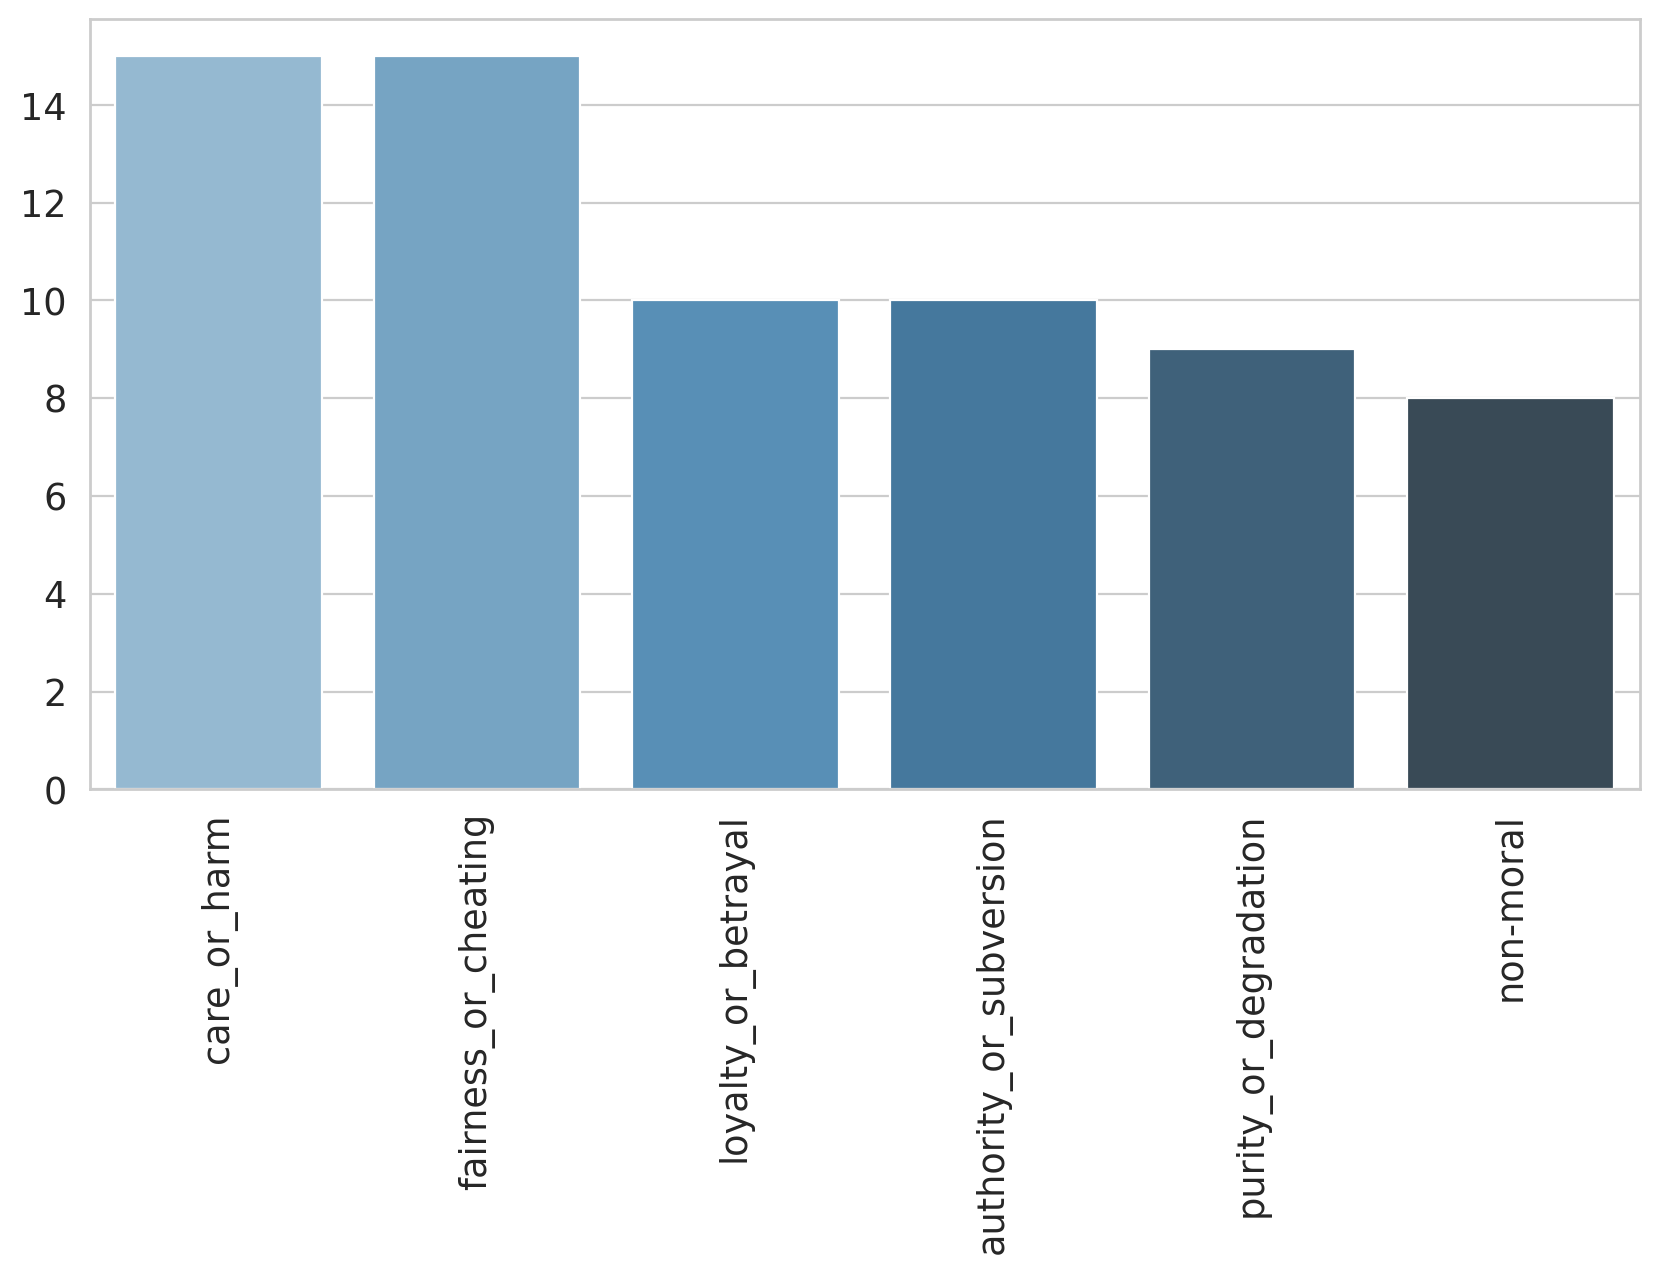

In [10]:
import json
import pandas as pd
import pickle
path = '../../../data/moral/interim/train_test/twitter/train_bert_48samples.json'
with open(path, 'r') as f:
    data = [json.loads(line) for line in f]
df = pd.DataFrame(data)
# count the number of samples per class
bins = []
moral_value_list = ['care_or_harm', 'fairness_or_cheating', 'loyalty_or_betrayal', 'authority_or_subversion', 'purity_or_degradation', 'non-moral']
for moral_value in moral_value_list:
    bins.append(len(df[df[moral_value] == 1]))
    
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
figure = plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=moral_value_list, y=bins, palette="Blues_d")
plt.xticks(rotation=90)

## Binary

In [7]:
# BERT eval on Twitter
df_res = pd.DataFrame(columns=['class', 'f1', 'auc'])
output_path = '../../../data/moral/inferred/bert/binary/'
task_type = 'twitter'
model_name = 'bert-base-uncased'
res = pickle.load(open(output_path + 'test_preds_'+task_type+'_'+model_name.split("/")[-1].replace('-', '_')+'.pkl', 'rb'))
preds, labels, metrics = res[0], res[1], res[2]

for i in range(len(preds)):
    for j in range(len(preds[i])):
        if preds[i][j] > 0.5:
            preds[i][j] = 1
        else:
            preds[i][j] = 0

f1_per_class = f1_score(y_true=labels, y_pred=preds, average=None)
auc_per_class = roc_auc_score(y_true=labels, y_score=preds, average=None)
if task_type == 'twitter':
    df_res['class'] = ['care_or_harm', 'fairness_or_cheating', 'loyalty_or_betrayal', 'authority_or_subversion', 'purity_or_degradation', 'non-moral']
else:
    df_res['class'] = ['Purity', 'Loyalty', 'Non-Moral', 'Authority', 'Equality', 'Care', 'Proportionality']
df_res['f1'] = f1_per_class
df_res['auc'] = auc_per_class
df_res = df_res.append({'class': 'micro avg', 'f1': f1_score(y_true=labels, y_pred=preds, average='micro'), 'auc': roc_auc_score(y_true=labels, y_score=preds, average='micro')}, ignore_index=True)
df_res

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/moral/inferred/bert/binary/test_preds_twitter_bert_base_uncased.pkl'